# Voice-based detection of Parkinson´s Disease

This is a dataset on voice recordings obtained from patients suffering from Parkinson´s disease (PD) and controls (Ctrl) and is available on data-flair (https://data-flair.training/blogs/python-machine-learning-project-detecting-parkinson-disease/). PD is a neurodegenerative disorder characterized by motor impairments, including bradykinesia, tremor, and freezing of gait, but also by cognitive and emotional changes. Addtionally, PD patients show speech and voice abnormalities.

Here, we will test a combination of voice parameters in predicting the presence of PD.

## load and pre-process data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd_data = pd.read_csv("data\parkinsons.data")

In [2]:
print(f"The dataset contains {pd_data.shape[0]} observations and {pd_data.shape[1]} features.")

print("\nExample data points:")
pd_data.head(10)

The dataset contains 195 observations and 24 features.

Example data points:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


## Average over participants
The dataset contains data from voice recordings obtained from PD patients and controls. Disease status is coded by 'status' (0 = Control, 1 = PD). Several recordings (n = ~6) were obtained from each participant (see numbering in 'name' column). Thus, data need to be averaged over voice recordings to get mean values for each participant.

In [3]:
#replace string in 'name' with all characters except the last two, such that recordings from one participant have same ID
for i in range(pd_data.shape[0]):
    pd_data.loc[i, 'name'] = pd_data.loc[i, 'name'][:-2] 

pd_data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
# get mean scores per participant
pd_data = pd_data.groupby('name').mean().reset_index()

print(f"The dataset contains data from {pd_data.shape[0]} participants and {pd_data.shape[1]} features.")

print("\nExample data points:")
pd_data.head()

The dataset contains data from 32 participants and 24 features.

Example data points:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01,118.719333,141.312833,106.029833,0.010085,0.000087,0.004998,0.007312,0.014992,0.053932,...,0.084073,0.016318,20.406667,1.0,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,phon_R01_S02,99.770333,121.894333,95.413167,0.004585,0.000050,0.002325,0.002857,0.006978,0.021668,...,0.033125,0.008917,22.997333,1.0,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,phon_R01_S04,147.346167,216.867500,87.532333,0.004347,0.000030,0.001760,0.002320,0.005285,0.019343,...,0.028148,0.013080,23.899667,1.0,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,phon_R01_S05,159.837667,181.630167,86.767167,0.006247,0.000040,0.003062,0.003422,0.009188,0.043337,...,0.061477,0.025608,19.058667,1.0,0.626723,0.695886,-4.560947,0.278483,2.787869,0.310658
4,phon_R01_S06,150.644667,208.264333,78.278333,0.005230,0.000037,0.002725,0.002838,0.008173,0.021367,...,0.029023,0.014892,24.762000,1.0,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939


## Exploratory data analysis

In [5]:
# descriptive statistics
pd_data.describe().round(3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,32.000,32.000,32.000,32.000,32.0,32.000,32.000,32.000,32.000,32.000,...,32.000,32.000,32.000,32.00,32.000,32.000,32.000,32.000,32.000,32.000
mean,153.858,195.649,116.273,0.006,0.0,0.003,0.003,0.010,0.029,0.279,...,0.047,0.024,21.960,0.75,0.498,0.718,-5.699,0.225,2.372,0.205
std,40.949,62.765,37.628,0.004,0.0,0.003,0.002,0.008,0.017,0.172,...,0.027,0.035,4.186,0.44,0.096,0.054,0.970,0.070,0.317,0.081
min,97.938,107.758,66.234,0.002,0.0,0.001,0.001,0.003,0.011,0.096,...,0.016,0.001,12.062,0.00,0.328,0.638,-7.590,0.055,1.796,0.068
25%,118.115,140.414,93.420,0.004,0.0,0.002,0.002,0.005,0.017,0.161,...,0.027,0.006,19.601,0.75,0.428,0.669,-6.275,0.173,2.193,0.157
50%,150.105,197.206,104.581,0.005,0.0,0.002,0.003,0.007,0.024,0.217,...,0.040,0.013,22.173,1.00,0.486,0.720,-5.630,0.228,2.324,0.205
75%,183.745,226.453,128.351,0.007,0.0,0.004,0.004,0.012,0.037,0.330,...,0.059,0.026,24.811,1.00,0.589,0.763,-5.173,0.282,2.536,0.234
max,243.814,393.856,222.115,0.021,0.0,0.013,0.012,0.038,0.078,0.871,...,0.113,0.174,30.992,1.00,0.638,0.821,-3.657,0.359,3.141,0.395


In [6]:
# get column names and select feature variable names only (i.e. all variables but status and name)
colnames = pd_data.columns
colnames = colnames.drop(['name', 'status'])
print(colnames)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


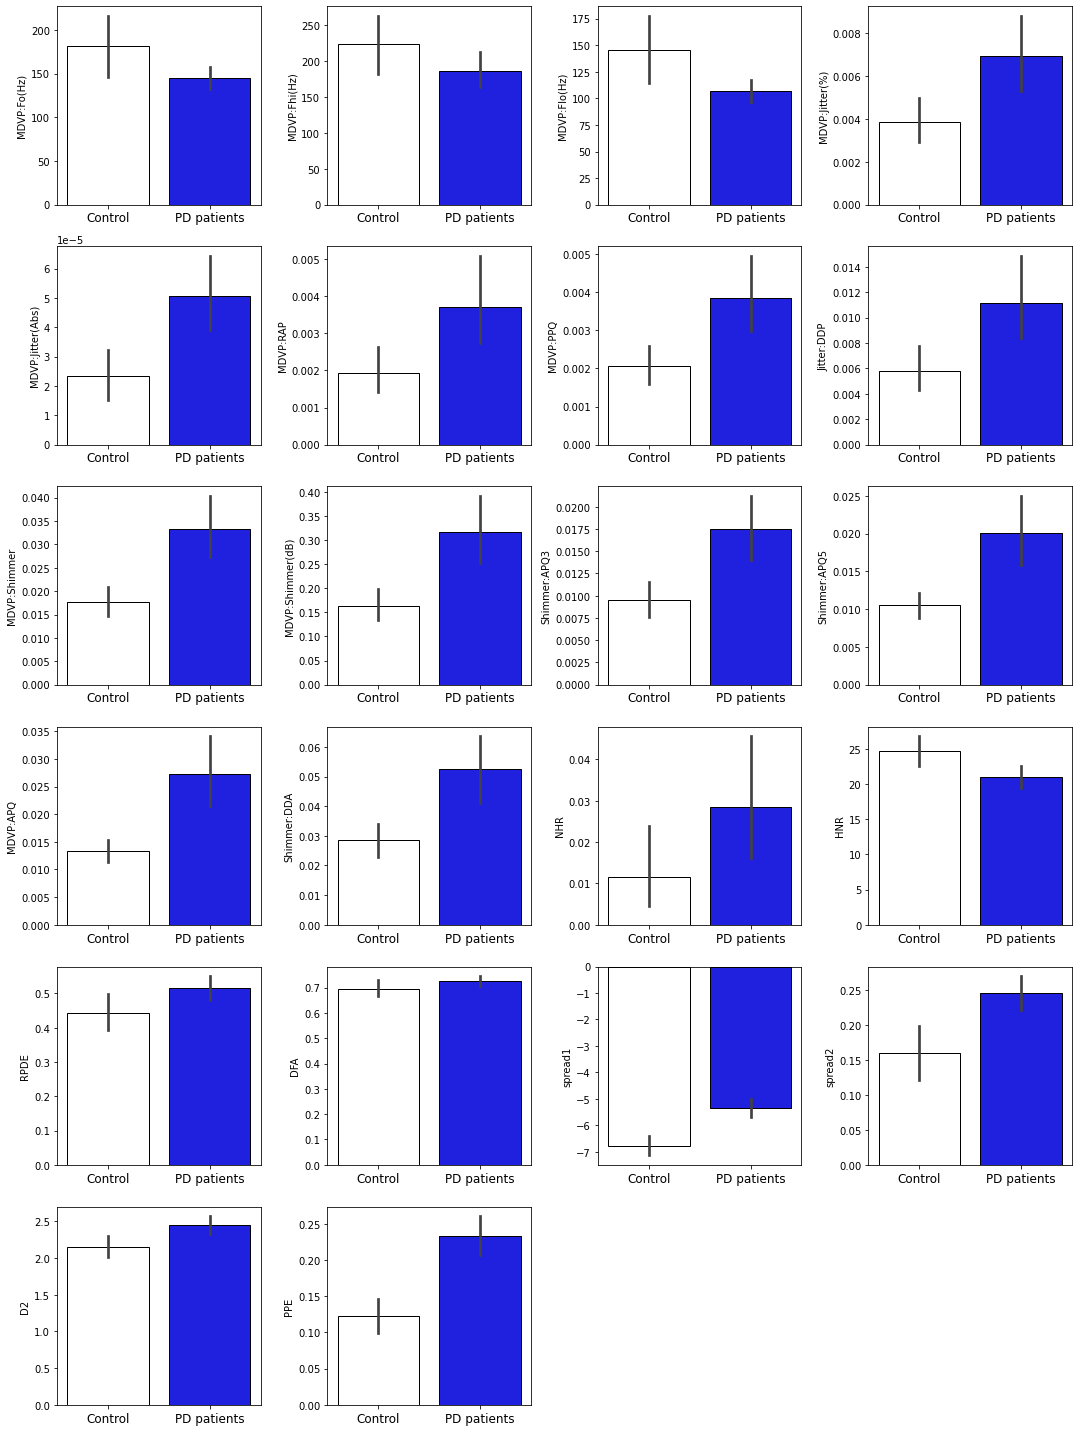

In [7]:
fig = plt.figure(figsize=(15, 20))

for i in range(1, len(colnames)+1): # start with i=1 (0th subplot is not possible)
    ax = fig.add_subplot(6, 4, i) # arrange figure as rows = 6 x cols = 4 panel and add ith subplot
    subplot = sns.barplot(x='status', y=colnames[i-1], data=pd_data, edgecolor='black', 
                          palette={0: "white", 1: "blue"})
    ax.set_xticks(np.arange(0, 2), ['Control', 'PD patients'], size=12)
    ax.set_xlabel(None)

fig.tight_layout() # prevents subplots from overlapping

In [8]:
# check which features significantly differ between groups using unpaired t-tests
import scipy.stats as stats
ttest_results = {}
for x in colnames:
    res = stats.ttest_ind(pd_data.loc[pd_data['status']==0, x],
                   pd_data.loc[pd_data['status']==1, x])
    ttest_results[x] = [res[0], res[1]]

In [9]:
# print results
for key, value in ttest_results.items():
    print(f"{key}: t = {round(value[0],2)}, p = {round(value[1],4):.4f}", "*" if value[1] < 0.05 else 'n.s.')

MDVP:Fo(Hz): t = 2.41, p = 0.0225 *
MDVP:Fhi(Hz): t = 1.48, p = 0.1482 n.s.
MDVP:Flo(Hz): t = 2.77, p = 0.0096 *
MDVP:Jitter(%): t = -1.82, p = 0.0791 n.s.
MDVP:Jitter(Abs): t = -2.27, p = 0.0305 *
MDVP:RAP: t = -1.74, p = 0.0920 n.s.
MDVP:PPQ: t = -1.88, p = 0.0703 n.s.
Jitter:DDP: t = -1.74, p = 0.0920 n.s.
MDVP:Shimmer: t = -2.5, p = 0.0180 *
MDVP:Shimmer(dB): t = -2.36, p = 0.0249 *
Shimmer:APQ3: t = -2.38, p = 0.0237 *
Shimmer:APQ5: t = -2.33, p = 0.0268 *
MDVP:APQ: t = -2.45, p = 0.0205 *
Shimmer:DDA: t = -2.38, p = 0.0237 *
NHR: t = -1.2, p = 0.2376 n.s.
HNR: t = 2.26, p = 0.0315 *
RPDE: t = -1.98, p = 0.0568 n.s.
DFA: t = -1.38, p = 0.1775 n.s.
spread1: t = -4.58, p = 0.0001 *
spread2: t = -3.54, p = 0.0013 *
D2: t = -2.41, p = 0.0222 *
PPE: t = -4.1, p = 0.0003 *


In [10]:
# select only significant features
sig_features = [key for key, value in ttest_results.items() if value[1] < 0.05]
sig_features.append('status')
pd_data_filtered = pd_data[sig_features]
pd_data_filtered.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,spread1,spread2,D2,PPE,status
0,118.719333,106.029833,0.000087,0.053932,0.515167,0.028025,0.039770,0.037348,0.084073,20.406667,-4.239926,0.296836,2.342642,0.353841,1.0
1,99.770333,95.413167,0.000050,0.021668,0.194333,0.011042,0.013113,0.018123,0.033125,22.997333,-5.420414,0.308289,2.287428,0.234019,1.0
2,147.346167,87.532333,0.000030,0.019343,0.181667,0.009383,0.011003,0.018410,0.028148,23.899667,-5.337281,0.249288,2.360638,0.232007,1.0
3,159.837667,86.767167,0.000040,0.043337,0.388167,0.020492,0.026550,0.044458,0.061477,19.058667,-4.560947,0.278483,2.787869,0.310658,1.0
4,150.644667,78.278333,0.000037,0.021367,0.209667,0.009673,0.012625,0.020725,0.029023,24.762000,-6.223537,0.228296,2.440360,0.164939,1.0


In [11]:
# check correlations among significant features
pearson_corrs = pd_data_filtered.drop(['status'], axis=1).corr(method='pearson') # compute pairwise correlations
var_names = pearson_corrs.columns

pearson_corrs = pd.DataFrame(np.tril(pearson_corrs, k=-1), #select lower matrix triangle w/o main diagonal
                             columns=var_names)
pearson_corrs.index = var_names #set index names
pearson_corrs[pearson_corrs.abs() > 0.5].fillna("")

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,spread1,spread2,D2,PPE
MDVP:Fo(Hz),,,,,,,,,,,,,,
MDVP:Flo(Hz),0.688982,,,,,,,,,,,,,
MDVP:Jitter(Abs),,,,,,,,,,,,,,
MDVP:Shimmer,,,0.732167,,,,,,,,,,,
MDVP:Shimmer(dB),,,0.740197,0.991363,,,,,,,,,,
Shimmer:APQ3,,,0.728654,0.989715,0.970063,,,,,,,,,
Shimmer:APQ5,,,0.676564,0.983955,0.978932,0.964614,,,,,,,,
MDVP:APQ,,,0.684315,0.9607,0.975224,0.916193,0.949724,,,,,,,
Shimmer:DDA,,,0.728665,0.989716,0.970063,1.0,0.964615,0.916195,,,,,,
HNR,,,-0.667661,-0.88794,-0.874695,-0.892031,-0.853537,-0.845219,-0.892036,,,,,


## Predicting Parkinson´s disease
After exploratory analysis, the different voice parameters will be used as predictors in a logistic regression model for predicting the presence of PD. Since there are only few participants (n=32) and rather many features (m=24), we will compare the performance of logistic regression trained on the original features with the performance of a logistic regression model trained on a reduced feature space following principal component analysis.

In [12]:
# split into training and test set
from sklearn.model_selection import train_test_split

X = pd_data_filtered.drop(['status'], axis=1)
y = pd_data_filtered['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Training set: {X_train.shape} for X and {y_train.shape} for y.")
print(f"Test set: {X_test.shape} for X and {y_test.shape} for y.")

print(f"\nClass distribution in training set:\n{y_train.value_counts()}")
print(f"\nClass distribution in test set:\n{y_test.value_counts()}")

Training set: (19, 14) for X and (19,) for y.
Test set: (13, 14) for X and (13,) for y.

Class distribution in training set:
1.0    14
0.0     5
Name: status, dtype: int64

Class distribution in test set:
1.0    10
0.0     3
Name: status, dtype: int64


In [13]:
#standardize X_train and project onto X_test
from sklearn.preprocessing import StandardScaler
z_scale = StandardScaler().fit(X_train)
X_train = z_scale.transform(X_train)
X_test = z_scale.transform(X_test)

#print means and SDs for X_train
print('Means and SDs for normalized X_train')
for column in range(X_train.shape[1]):
    print(round(np.mean(X_train[:, column]),2), ", ", round(np.std(X_train[:, column]),2),)

#print means and SDs for X_test
print('\nMeans and SDs for normalized X_test')
for column in range(X_test.shape[1]):
    print(round(np.mean(X_test[:, column]),2), ", ", round(np.std(X_test[:, column]),2))

Means and SDs for normalized X_train
0.0 ,  1.0
0.0 ,  1.0
-0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
-0.0 ,  1.0
-0.0 ,  1.0
0.0 ,  1.0

Means and SDs for normalized X_test
-0.48 ,  0.61
0.1 ,  0.74
1.25 ,  2.56
0.53 ,  1.78
0.66 ,  2.07
0.46 ,  1.68
0.58 ,  1.91
0.58 ,  1.92
0.46 ,  1.68
0.2 ,  1.53
0.35 ,  1.65
0.21 ,  0.78
-0.4 ,  1.25
0.4 ,  1.8


### Dimensionality reduction
There are many highly correlated variables in the feature set. Reduce intercorrelated features to lower dimensional space using principal component analysis.

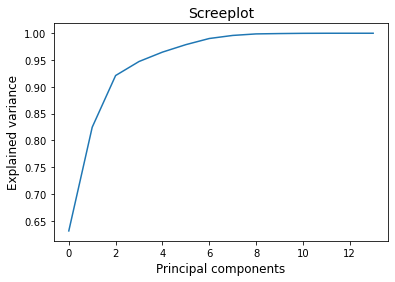

In [14]:
# perform PCA and determine number of principal components to extract using a screeplot
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

# plot screeplot as cumulative explained variance by principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components', size=12)
plt.ylabel('Explained variance', size=12)
plt.title('Screeplot', size=14)
plt.show()

With 6 principal components, >95% of the original variance in the data is preserved, while reducing the feature space by >50%.

In [15]:
# re-perform PCA on training data and extract the first 10 principal components
pca_10 = PCA(n_components=6)
pca_10.fit(X_train)

#map training and test set onto new feature space fit based on training set
Z_train = pca_10.transform(X_train)
Z_test = pca_10.transform(X_test)

#shape after dimensionality reduction
print(f"Training set: {Z_train.shape}")
print(f"Test set: {Z_test.shape}")

Training set: (19, 6)
Test set: (13, 6)


### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

# train and predict w/ orginal feature set
lr_original = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat_original = lr_original.predict(X_test)

# train and predict w/ reduced feature set
lr_reduced = LogisticRegression(C=0.01, solver='liblinear').fit(Z_train, y_train)
yhat_reduced = lr_reduced.predict(Z_test)

In [17]:
# import metrics for comparing model accuracy for models trained on original and reduced feature set
from sklearn.metrics import classification_report, confusion_matrix

# define plotting function for confusion matrix
def plot_conf_matrix(conf_matrix, class_labels, title):
    """
    This function takes the confusion matrix computed using sklearn and corresponding class labels as arguments 
    and plots the data as a color-coded heatmap.
    """
    # normalize class predictions, returns percentage of class predictions for each label
    normalized = 100*(conf_matrix / np.sum(conf_matrix, axis=1)[:,np.newaxis]) #sums over all column values in a row
    
    # plot data as heatmap using imshow
    fig, ax = plt.subplots(figsize=(4, 4))
    heatmap = ax.imshow(normalized, cmap='Blues')
    cbar = plt.colorbar(heatmap, shrink=0.8)
    cbar.set_label("% predicted", size=12)
    
    ax.set_title(f"{title}\n", size=16)
    tick_marks = range(len(class_labels)) # get number of tick marks
    ax.set_xticks(tick_marks, class_labels, size=12, rotation=45) # plot corresponding class labels
    ax.set_yticks(tick_marks, class_labels, size=12) # ""
    ax.set_xlabel("Predicted", size=14)
    ax.set_ylabel("True", size=14)
    
    #loop over range of class labels in 2D (as matrix coordinates) and plot data as cell values
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            ax.text(y=i, x=j,
                    #plot percent predicted (i.e. normalized data), followed by absolute number (in square brackets) 
                    s=f"{round(normalized[i,j], 1)}%\n[{conf_matrix[i,j]}]",
                    horizontalalignment='center', verticalalignment='center',
                    #if value > average (resulting in dark cell color), use white as font color, else black
                    color="white" if conf_matrix[i, j] > conf_matrix.mean() else "black", size=11)

Model accuary with original feature space

               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.70      0.82        10

    accuracy                           0.77        13
   macro avg       0.75      0.85      0.75        13
weighted avg       0.88      0.77      0.79        13



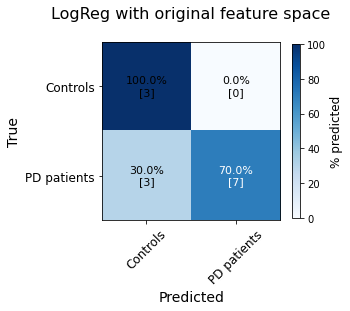

In [18]:
#classification report
print('Model accuary with original feature space\n\n', classification_report(y_test, yhat_original))

#compute confusion matrix and plot
cm_original = confusion_matrix(y_test, yhat_original, labels=[0, 1])
plot_conf_matrix(cm_original, ['Controls', 'PD patients'], 'LogReg with original feature space')

Model accuarcy with reduced feature space

               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.70      0.82        10

    accuracy                           0.77        13
   macro avg       0.75      0.85      0.75        13
weighted avg       0.88      0.77      0.79        13



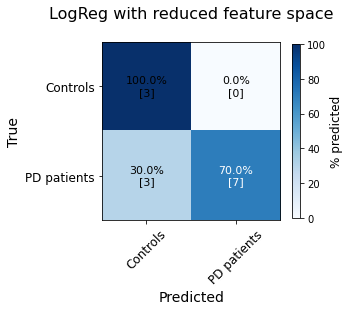

In [19]:
#classification report
print('Model accuarcy with reduced feature space\n\n', classification_report(y_test, yhat_reduced))

#compute confusion matrix and plot
cm_reduced = confusion_matrix(y_test, yhat_reduced, labels=[0, 1])
plot_conf_matrix(cm_reduced, ['Controls', 'PD patients'], 'LogReg with reduced feature space')

## Support Vector Machine

In [20]:
from sklearn import svm

# train and predict w/ orginal feature set
svm_original = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat_svm_original = svm_original.predict(X_test)

# train and predict w/ reduced feature set
svm_reduced = svm.SVC(kernel='rbf').fit(Z_train, y_train)
yhat_svm_reduced = svm_reduced.predict(Z_test)

Model accuary with original feature space

               precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.83      1.00      0.91        10

    accuracy                           0.85        13
   macro avg       0.92      0.67      0.70        13
weighted avg       0.87      0.85      0.81        13



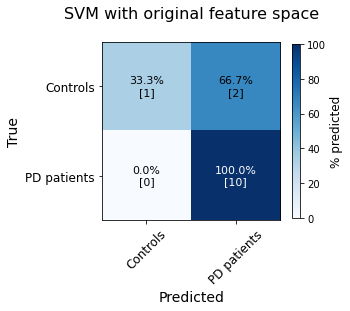

In [21]:
#classification report
print('Model accuary with original feature space\n\n', classification_report(y_test, yhat_svm_original))

#compute confusion matrix and plot
cm_original = confusion_matrix(y_test, yhat_svm_original, labels=[0, 1])
plot_conf_matrix(cm_original, ['Controls', 'PD patients'], 'SVM with original feature space')

Model accuary with redzced feature space

               precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.83      1.00      0.91        10

    accuracy                           0.85        13
   macro avg       0.92      0.67      0.70        13
weighted avg       0.87      0.85      0.81        13



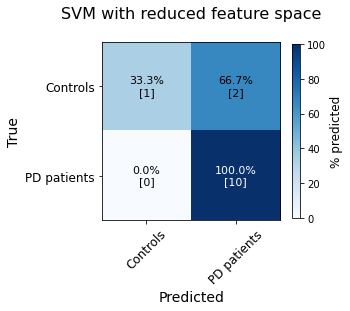

In [22]:
#classification report
print('Model accuary with redzced feature space\n\n', classification_report(y_test, yhat_svm_reduced))

#compute confusion matrix and plot
cm_original = confusion_matrix(y_test, yhat_svm_reduced, labels=[0, 1])
plot_conf_matrix(cm_original, ['Controls', 'PD patients'], 'SVM with reduced feature space')

## Conclusion
For both logistic regression and support vector machine models, condensing correlated features to underlying dimensions with principal component analysis makes no difference for predicting whether or not a person is suffering from Parkinson´s disease. It may only save computing time when training on larger datasets. Moreover, the model accuracy is rather low and other models should be implemented and tested for better prediction accuracy.